In [1]:
import numpy as np
from sklearn import datasets
from sklearn.semi_supervised import LabelPropagation
import pandas as pd
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pickle
import io
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
import re
import pandas as pd
import l3 as l #hornomo
import io
from contextlib import redirect_stdout
import numpy as np
import gensim 
from sklearn.svm import SVC
from sklearn import svm
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


>>>>> This is L3Morpho, version 3.0 <<<<<
>>>>>  and HornMorpho, version 2.5  <<<<<


In [2]:
def clean_and_normalized_sentence (list_of_sentences , lable ):
    print(list_of_sentences)
    cleaned_sentence = {"msg":[] , "labl": []  }
    words_normalized =  {"msg":[] , "labl": []  }
    normalized_word = ''
    clean_text = ''
    if lable != '':
        for (sentence , lable)  in zip (list_of_sentences, lable)  :
                    print(sentence)
                    sentence = re.sub(r"/","", str(sentence))
                    sentence=  re.sub(r"\_"," ", str(sentence))
                    sentence = re.sub(r"[\W]+"," ", str(sentence))
                    sentence = re.sub(r"[a-zA-Z0-9]","", str(sentence))
                    sentence = re.sub(r"\s+", " " ,str(sentence))
                    sentence = re.sub(r"^\s", "", str(sentence))
                    sentence = re.sub(r"^\s[\W]\s"," ", str(sentence))
                    sentence = re.sub(r"\s$","", str(sentence))
                    clean_text = sentence
                    cleaned_sentence["msg"].append(clean_text)
                    cleaned_sentence["labl"].append(lable)
                    clean_text =''
    else :
         for sentence in list_of_sentences:
                    print(sentence)
                    sentence = re.sub(r"/","", str(sentence))
                    sentence=  re.sub(r"\_"," ", str(sentence))
                    sentence = re.sub(r"[\W]+"," ", str(sentence))
                    sentence = re.sub(r"[a-zA-Z0-9]","", str(sentence))
                    sentence = re.sub(r"\s+", " " ,str(sentence))
                    sentence = re.sub(r"^\s", "", str(sentence))
                    sentence = re.sub(r"^\s[\W]\s"," ", str(sentence))
                    sentence = re.sub(r"\s$","", str(sentence))
                    clean_text = sentence
                    cleaned_sentence["msg"].append(clean_text)
                    clean_text =''
    print(len(cleaned_sentence))
    if lable != '':
            for (sent , labl)  in zip (cleaned_sentence['msg'], cleaned_sentence['labl']):
                words_normalized["msg"].append(word_normaliztion(sent))
                words_normalized["labl"].append(cat)
    else:
            for sent  in cleaned_sentence['msg']:
                words_normalized["msg"].append(word_normaliztion(sent))
    return words_normalized

In [3]:
def word_normaliztion(input_token):
    rep1=re.sub('[ሃኅኃሐሓኻ]','ሀ',input_token)
    rep2=re.sub('[ሑኁዅ]','ሁ',rep1)
    rep3=re.sub('[ኂሒኺ]','ሂ',rep2)
    rep4=re.sub('[ኌሔዄ]','ሄ',rep3)
    rep5=re.sub('[ሕኅ]','ህ',rep4)
    rep6=re.sub('[ኆሖኾ]','ሆ',rep5)
    rep7=re.sub('[ሠ]','ሰ',rep6)
    rep8=re.sub('[ሡ]','ሱ',rep7)
    rep9=re.sub('[ሢ]','ሲ',rep8)
    rep10=re.sub('[ሣ]','ሳ',rep9)
    rep11=re.sub('[ሤ]','ሴ',rep10)
    rep12=re.sub('[ሥ]','ስ',rep11)
    rep13=re.sub('[ሦ]','ሶ',rep12)
    rep14=re.sub('[ዓኣዐ]','አ',rep13)
    rep15=re.sub('[ዑ]','ኡ',rep14)
    rep16=re.sub('[ዒ]','ኢ',rep15)
    rep17=re.sub('[ዔ]','ኤ',rep16)
    rep18=re.sub('[ዕ]','እ',rep17)
    rep19=re.sub('[ዖ]','ኦ',rep18)
    rep20=re.sub('[ጸ]','ፀ',rep19)
    rep21=re.sub('[ጹ]','ፁ',rep20)
    rep22=re.sub('[ጺ]','ፂ',rep21)
    rep23=re.sub('[ጻ]','ፃ',rep22)
    rep24=re.sub('[ጼ]','ፄ',rep23)
    rep25=re.sub('[ጽ]','ፅ',rep24)
    rep26=re.sub('[ጾ]','ፆ',rep25)
    return rep26

In [4]:
def getRootWord(word):
    pos2 = 0
    s = ''
    with redirect_stdout(io.StringIO()) as f:
        l.anal_word('am',word , root=False,gram=False,nbest=1 )
        s = f.getvalue()
    hornmorpho = str(s)
    rootWord = ''
    #print(hornmorpho)
    hornmorpho = re.sub(r"[\s\',:<>?*]",'',hornmorpho)
    hornmorpho = hornmorpho.strip("[]")
    #print(hornmorpho)
    #print("after regular expression added\n",hornmorpho)

    if hornmorpho.find('stem') != -1:
        pos2 =  hornmorpho.find('stem')
        #print(pos2)
        rootWord = hornmorpho[pos2+4:]
    elif hornmorpho.find('citation') !=-1 :
        pos2 = hornmorpho.find('citation')
        #print(pos2)
        rootWord = hornmorpho[pos2+8:]  #find the postion steam start and add navigate 4 char position you get the steam word
    elif hornmorpho.find('word') != -1:
        pos2 = hornmorpho.find('word')
        #print(pos2)
        rootWord = hornmorpho[pos2+4:]  #find the postion steam start and add navigate 4 char position you get the steam word
        rootWord = rootWord.replace("POScopularootne","")
    else:
        rootWord = hornmorpho
    #print(rootWord)
    return rootWord

In [5]:
def morphologicalAnalysis(sentences):
    count = 1
    normalWord = ''
    morphoAnalWords = []  #{"headline" : [] , "category":[] , "categoryID" : []}
    for sent in sentences :
        print(count)
        word_from_sent = str(sent).split(" ")
        for word in word_from_sent:
            normalWord = normalWord+' '+getRootWord(word)
        normalWord = re.sub(r"^\s[\W]\s"," ", normalWord)
        normalWord = re.sub(r"^\s","", normalWord)
        morphoAnalWords.append(normalWord)
        print(count , " - ", normalWord)
        normalWord = ''
        count = count + 1
        
    return morphoAnalWords


# Dataset

In [6]:
proMorpho = pd.read_excel("D:\\NLP\\FINAL\\FINAL-MA-PRO.xlsx")
proMorpho.sample(10)
labels = proMorpho['Stance']
print(proMorpho.sample(10))


                                                    msg  \
227                   ስው በዛ ጠራ   ጦርነት ብቻ  አመረተ ዜጋ ህልውና    
2045  ሽዋ ተቆጠረ መከላከይ ህይወት ቀጠፍ ፓለቲከኛ እስር ፈታ ወንድም ነፍስ ተ...   
1617                          ሌብነት ስራ ደረጉ መራ ጸዳ  በዛ በጣም   
2906  ዛሬ ጁባ ኤርፖርት   ተጋራ ወታደር  ድብደባ ፈጸመ  ሌላ ብሄር  ወታደር...   
1002             ውስጥ ነካ ላቀ ድጋፍ  ችግር ውስጥ  ተረዳ ቆራጠጠ  አሸነፈ   
135                    ልዩነት አጠበበ ወደ ጋራ ተግባባ ደረሰ ላቀ ነገር    
718                            ኮራ አለ እንጂ ጀግና  አሳየ አመሰገነ   
1720   ታረደ ተሰደደ ስቅይ  እሺ ኑሮ ውድነት ወይስ ዘረኝነት እነ ኦነግ  አማ...   
622                         ጋር ፊት በራ ና  መረጠ ምርጫ አርድ ወሰደ   
1183  ዋጋ ግሽበት ኢትዮጵያ ፈተና ብቻ ሆነ አለም አቀፈ ማህበረሰብ ችግር ነው ...   

                                                  Clean     Target      labl  \
227         ስው ብዛት ጥሩ  ሆኖም ጦርነት ብቻ ሳይሆን አምራች ዜጋና ህልውናም   ብልጽግና ፓርቲ   INFAVOR   
2045  በሽዎች የሚቆጠሩ መከላከያችን ህይወታቸውን የቀጠፍ ፓለቲከኛ ከእስር እየፈ...  ብልጽግና ፓርቲ  AGAINIST   
1617              ብልፅግና ሌብነትን ስራ ከደረጉ አመራሮች ስፀዳ  በዛ በጣም  ብልጽግና ፓርቲ  AGAINIST   
2906  ዛሬ ጁባ ኤርፖርት  በሚሆኑ ተጋሩ ወታ

In [12]:
proMorpho = pd.DataFrame(proMorpho)


1    1563
0    1563
Name: Stance, dtype: int64
percent 0 50.0
percent 1 50.0


<AxesSubplot: xlabel='Stance', ylabel='count'>

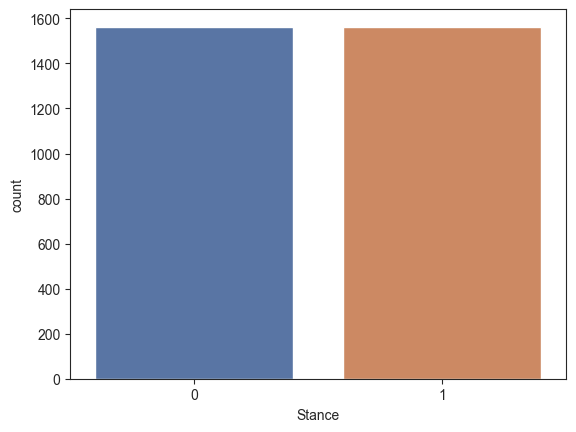

In [13]:
import seaborn as sns
print(proMorpho['Stance'].value_counts())
cnt1 = len(proMorpho[proMorpho['Stance']==1])
cnt0 = len(proMorpho[proMorpho['Stance']==0])
pct0 = cnt0/(cnt1+cnt0)
print('percent 0',round(pct0*100,2))
pct1 = cnt1/(cnt0+cnt1)
print('percent 1',round(pct1*100,2))
sns.set_style('ticks')
sns.countplot(x=proMorpho['Stance'],palette='deep') # to show the proportion of the positive and negative label

# BOWS

In [136]:
bow = CountVectorizer(min_df=3)
bowsFeaturesPro = bow.fit_transform(proMorpho['msg']).toarray()
bowsFeaturesPro.shape
labels = proMorpho['Stance']
print(bowsFeaturesPro.shape)

(3126, 2672)


In [137]:
X_train, X_test, y_train, y_test= train_test_split(bowsFeaturesPro,
                                                 labels,
                                                 test_size=0.2,
                                                 random_state=0)


ACCURACY OF THE MODEL:  0.7476038338658147
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       314
           1       0.73      0.79      0.76       312

    accuracy                           0.75       626
   macro avg       0.75      0.75      0.75       626
weighted avg       0.75      0.75      0.75       626

[[223  91]
 [ 67 245]]


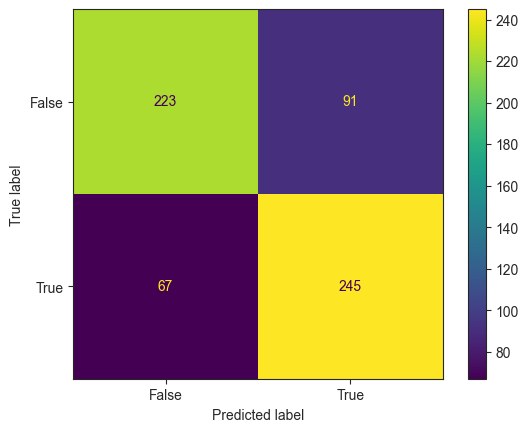

[0.71588635 0.77999648 0.80798771 0.73999584 0.73996255 0.72203871
 0.76786629 0.73996255 0.72784324 0.7559961 ]


In [138]:
# ------------- Build Model SVM using TF-IDF-------------#
svmModel = SVC(kernel='linear')

svmModel.fit(X_train, y_train)
y_pred = svmModel.predict(X_test)

print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
accuracy_score(y_test,y_pred)

## Export model
pickle.dump(svmModel, open('D:\\NLP\\model\\pro-svm-model-bow.pkl', 'wb'))
pickle.dump(bowsFeaturesPro, open('D:\\NLP\\model\\pro-bow.pkl', 'wb'))

## Importing Model
svmtfTrainedModel = pickle.load(open('D:\\NLP\\model\\pro-svm-model-bow.pkl', 'rb'))
bowsFeaturesPro = pickle.load(open('D:\\NLP\\model\\pro-bow.pkl', 'rb'))


confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)
import matplotlib.pyplot as plt


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()


import matplotlib.pyplot as plt

scores = cross_val_score( svmtfTrainedModel, X_train, y_train, cv=10, scoring='f1_macro')
print(scores)

# BOW + SVM Prediction unseen comments


In [139]:

#test = ['ህወሓት ደሞ በተቃራኒው ስምምነቱ ዳር ቁርጠኝነት እየሰራ ነዋ ::','አንቺ ነሽ ሌላ ፍላጎት ያለሽ ኦነጋዊነትሽን እያስመስከርሽ ያለሽ']

test = ['ህወሓት ደሞ በተቃራኒው ስምምነቱ ዳር እንዳይደርስ በሙሉ ቁርጠኝነት እየሰራ ነዋ ::',
        'መሳርያ የላቸውም በፈለግነው ሰዓት ትግራይ መቆጣጠር እንችላለን አቅም የላቸውም እያልክ አልነበረም እንዴ ቱልቱላ',
        'ይህ ሁሉ የሆነው በማሸነፋችን ነው ህወሃት ሂሣብ እናወራርዳለን ፉከራ ወደ ትጥቅ መፍታት ያመጣው።']

test = clean_and_normalized_sentence(test,'')
test = morphologicalAnalysis(test['msg'])
unseen_df = pd.DataFrame({'msg':test}) 


X_unseen = bow.transform(unseen_df['msg']).toarray()
y_pred_unseen = svmtfTrainedModel.predict(X_unseen)
print(y_pred_unseen.tolist())
print('******Prediction**********\n')
print(y_pred_unseen.tolist())

['ህወሓት ደሞ በተቃራኒው ስምምነቱ ዳር እንዳይደርስ በሙሉ ቁርጠኝነት እየሰራ ነዋ ::', 'መሳርያ የላቸውም በፈለግነው ሰዓት ትግራይ መቆጣጠር እንችላለን አቅም የላቸውም እያልክ አልነበረም እንዴ ቱልቱላ', 'ይህ ሁሉ የሆነው በማሸነፋችን ነው ህወሃት ሂሣብ እናወራርዳለን ፉከራ ወደ ትጥቅ መፍታት ያመጣው።']
ህወሓት ደሞ በተቃራኒው ስምምነቱ ዳር እንዳይደርስ በሙሉ ቁርጠኝነት እየሰራ ነዋ ::
መሳርያ የላቸውም በፈለግነው ሰዓት ትግራይ መቆጣጠር እንችላለን አቅም የላቸውም እያልክ አልነበረም እንዴ ቱልቱላ
ይህ ሁሉ የሆነው በማሸነፋችን ነው ህወሃት ሂሣብ እናወራርዳለን ፉከራ ወደ ትጥቅ መፍታት ያመጣው።
2
1
1  -  ህወሀት ደመመ ተቃራኒ ስምምነት ዳር ደረሰ ሙሉ ቁርጠኝነት ሰራ ነዋ
2
2  -  ተሳራ አለ ፈለገ ሰአት ትግራይ ተቆጣጠረ ቻለ አቅም አለ አለ ነበረ እንድ ቱልቱላ
3
3  -  ይህ ሁሉ ሆነ አሸነፈ ነው ህወሀት ሂሳብ አወራረደ ፉከራ ወደ ትጥቅ ፈታ አመጣ
[1, 0, 1]
******Prediction**********

[1, 0, 1]


# N-gram

In [14]:
bigram = CountVectorizer(ngram_range=(2,2),min_df=2)
bigramFeatures = bigram.fit_transform(proMorpho['msg']).toarray()
labels = proMorpho['Stance']

bigramFeatures.shape


(3126, 6686)

In [ ]:
trigram = CountVectorizer(ngram_range=(3,3))
trigramFeatures = trigram.fit_transform(proMorpho['msg']).toarray()
trigramFeatures.shape

In [15]:
X_train, X_test, y_train, y_test= train_test_split(bigramFeatures,
                                                 labels,
                                                 test_size=0.2,
                                                 random_state=0)

ACCURACY OF THE MODEL:  0.6597444089456869
              precision    recall  f1-score   support

           0       0.70      0.56      0.62       314
           1       0.63      0.76      0.69       312

    accuracy                           0.66       626
   macro avg       0.67      0.66      0.66       626
weighted avg       0.67      0.66      0.66       626

[[177 137]
 [ 76 236]]


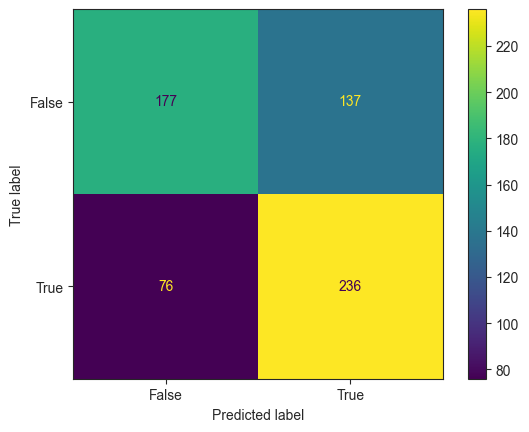

[0.63606366 0.68719024 0.67750258 0.58883588 0.61399897 0.61442067
 0.65842054 0.66988728 0.68671679 0.67094038]


In [16]:
# ------------- Build Model SVM using TF-IDF-------------#
svmModel = LinearSVC()

svmModel.fit(X_train, y_train)
y_pred = svmModel.predict(X_test)

print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
accuracy_score(y_test,y_pred)

## Export model
pickle.dump(svmModel, open('D:\\NLP\\model\\pro-svm-model-bi.pkl', 'wb'))
pickle.dump(bigramFeatures, open('D:\\NLP\\model\\pro-bi.pkl', 'wb'))

## Importing Model
svmtfTrainedModel = pickle.load(open('D:\\NLP\\model\\pro-svm-model-bi.pkl', 'rb'))
bigramFeatures = pickle.load(open('D:\\NLP\\model\\pro-bi.pkl', 'rb'))


confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)
import matplotlib.pyplot as plt


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

scores = cross_val_score( svmtfTrainedModel, X_train, y_train, cv=10, scoring='f1_macro')
print(scores)

# N-gram + SVM Prediction unseen comments


In [17]:

#test = ['ህወሓት ደሞ በተቃራኒው ስምምነቱ ዳር ቁርጠኝነት እየሰራ ነዋ ::','አንቺ ነሽ ሌላ ፍላጎት ያለሽ ኦነጋዊነትሽን እያስመስከርሽ ያለሽ']

test = ['ህወሓት ደሞ በተቃራኒው ስምምነቱ ዳር እንዳይደርስ በሙሉ ቁርጠኝነት እየሰራ ነዋ ::',
        'መሳርያ የላቸውም በፈለግነው ሰዓት ትግራይ መቆጣጠር እንችላለን አቅም የላቸውም እያልክ አልነበረም እንዴ ቱልቱላ',
        'ይህ ሁሉ የሆነው በማሸነፋችን ነው ህወሃት ሂሣብ እናወራርዳለን ፉከራ ወደ ትጥቅ መፍታት ያመጣው።']

test = clean_and_normalized_sentence(test,'')
test = morphologicalAnalysis(test['msg'])
unseen_df = pd.DataFrame({'msg':test}) 


X_unseen = bigram.transform(unseen_df['msg']).toarray()
y_pred_unseen = svmtfTrainedModel.predict(X_unseen)
print(y_pred_unseen.tolist())
print('******Prediction**********\n')
print(y_pred_unseen.tolist())

['ህወሓት ደሞ በተቃራኒው ስምምነቱ ዳር እንዳይደርስ በሙሉ ቁርጠኝነት እየሰራ ነዋ ::', 'መሳርያ የላቸውም በፈለግነው ሰዓት ትግራይ መቆጣጠር እንችላለን አቅም የላቸውም እያልክ አልነበረም እንዴ ቱልቱላ', 'ይህ ሁሉ የሆነው በማሸነፋችን ነው ህወሃት ሂሣብ እናወራርዳለን ፉከራ ወደ ትጥቅ መፍታት ያመጣው።']
ህወሓት ደሞ በተቃራኒው ስምምነቱ ዳር እንዳይደርስ በሙሉ ቁርጠኝነት እየሰራ ነዋ ::
መሳርያ የላቸውም በፈለግነው ሰዓት ትግራይ መቆጣጠር እንችላለን አቅም የላቸውም እያልክ አልነበረም እንዴ ቱልቱላ
ይህ ሁሉ የሆነው በማሸነፋችን ነው ህወሃት ሂሣብ እናወራርዳለን ፉከራ ወደ ትጥቅ መፍታት ያመጣው።
2
1
1  -  ህወሀት ደመመ ተቃራኒ ስምምነት ዳር ደረሰ ሙሉ ቁርጠኝነት ሰራ ነዋ
2
2  -  ተሳራ አለ ፈለገ ሰአት ትግራይ ተቆጣጠረ ቻለ አቅም አለ አለ ነበረ እንድ ቱልቱላ
3
3  -  ይህ ሁሉ ሆነ አሸነፈ ነው ህወሀት ሂሳብ አወራረደ ፉከራ ወደ ትጥቅ ፈታ አመጣ
[1, 1, 0]
******Prediction**********

[1, 1, 0]


# TF-IDF

In [14]:

tfidfpro = TfidfVectorizer(min_df =2)
featurespro = tfidfpro.fit_transform(proMorpho['msg']).toarray()
labels = proMorpho['Stance']
featurespro.shape
print(featurespro)
print(featurespro.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(3126, 3847)


In [15]:
X_train, X_test, y_train, y_test= train_test_split(featurespro,
                                                 labels,
                                                 test_size=0.2,
                                                 random_state=0)

ACCURACY OF THE MODEL:  0.8178913738019169
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       314
           1       0.83      0.80      0.81       312

    accuracy                           0.82       626
   macro avg       0.82      0.82      0.82       626
weighted avg       0.82      0.82      0.82       626

[[263  51]
 [ 63 249]]


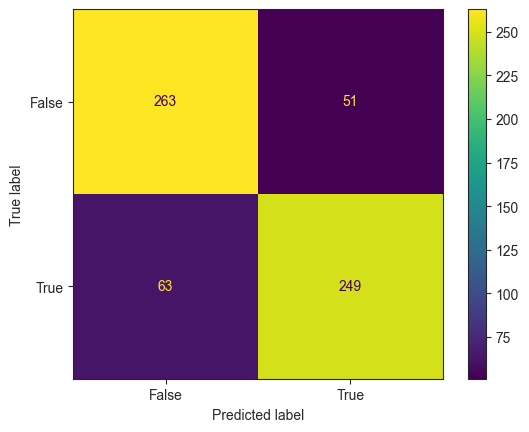

In [18]:
from sklearn.metrics import accuracy_score

# ------------- Build Model SVM using TF-IDF-------------#
svmModel = SVC()#SVC(C=0.1, gamma=1, kernel='linear')

svmModel.fit(X_train, y_train)
y_pred = svmModel.predict(X_test)

print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
accuracy_score(y_test,y_pred)

## Export model
pickle.dump(svmModel, open('D:\\NLP\\model\\svm-model-tf-pro.pkl', 'wb'))
pickle.dump(featurespro, open('D:\\NLP\\model\\tfidf-pro.pkl', 'wb'))

## Importing Model
svmtfTrainedModel = pickle.load(open('D:\\NLP\\model\\svm-model-tf-pro.pkl', 'rb'))
featurespro = pickle.load(open('D:\\NLP\\model\\tfidf-pro.pkl', 'rb'))


confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)
import matplotlib.pyplot as plt


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

#scores = cross_val_score( svmModel, X_train, y_train, cv=10, scoring='f1_macro')
#print(scores)



# TF-IDF + SVM Prediction unseen comments


In [19]:

#test = ['ህወሓት ደሞ በተቃራኒው ስምምነቱ ዳር ቁርጠኝነት እየሰራ ነዋ ::','አንቺ ነሽ ሌላ ፍላጎት ያለሽ ኦነጋዊነትሽን እያስመስከርሽ ያለሽ']

test = ['ህወሓት ደሞ በተቃራኒው ስምምነቱ ዳር እንዳይደርስ በሙሉ ቁርጠኝነት እየሰራ ነዋ ::',
        'መሳርያ የላቸውም በፈለግነው ሰዓት ትግራይ መቆጣጠር እንችላለን አቅም የላቸውም እያልክ አልነበረም እንዴ ቱልቱላ',
        'ይህ ሁሉ የሆነው በማሸነፋችን ነው ህወሃት ሂሣብ እናወራርዳለን ፉከራ ወደ ትጥቅ መፍታት ያመጣው።']

test = clean_and_normalized_sentence(test,'')
test = morphologicalAnalysis(test['msg'])
unseen_df = pd.DataFrame({'msg':test}) 


X_unseen = tfidfpro.transform(unseen_df['msg']).toarray()
y_pred_unseen = svmtfTrainedModel.predict(X_unseen)
print(y_pred_unseen.tolist())
print('******Prediction**********\n')
print(y_pred_unseen.tolist())

['ህወሓት ደሞ በተቃራኒው ስምምነቱ ዳር እንዳይደርስ በሙሉ ቁርጠኝነት እየሰራ ነዋ ::', 'መሳርያ የላቸውም በፈለግነው ሰዓት ትግራይ መቆጣጠር እንችላለን አቅም የላቸውም እያልክ አልነበረም እንዴ ቱልቱላ', 'ይህ ሁሉ የሆነው በማሸነፋችን ነው ህወሃት ሂሣብ እናወራርዳለን ፉከራ ወደ ትጥቅ መፍታት ያመጣው።']
ህወሓት ደሞ በተቃራኒው ስምምነቱ ዳር እንዳይደርስ በሙሉ ቁርጠኝነት እየሰራ ነዋ ::
መሳርያ የላቸውም በፈለግነው ሰዓት ትግራይ መቆጣጠር እንችላለን አቅም የላቸውም እያልክ አልነበረም እንዴ ቱልቱላ
ይህ ሁሉ የሆነው በማሸነፋችን ነው ህወሃት ሂሣብ እናወራርዳለን ፉከራ ወደ ትጥቅ መፍታት ያመጣው።
2
1
1  -  ህወሀት ደመመ ተቃራኒ ስምምነት ዳር ደረሰ ሙሉ ቁርጠኝነት ሰራ ነዋ
2
2  -  ተሳራ አለ ፈለገ ሰአት ትግራይ ቈጣጠረ ቻለ አቅም አለ አለ ነበረ እንድ ቱልቱላ
3
3  -  ይህ ሁሉ ሆነ አሸነፈ ነው ህወሀት ሂሳብ አወራረደ ፉከራ ወደ ትጥቅ ፈታ አመጣ
[1, 0, 1]
******Prediction**********

[1, 0, 1]


# word2vec

In [44]:
protokenized = proMorpho['msg'].apply(lambda x: x.split()) # tokenizing 
print(protokenized)


0                                   [ህብረ, ብሄራዊ, ደነተ, ሀገር]
1                 [ለብልጽግን, ጉዞ, ማእድን, ልማት, ላቀ, አስተዋጽኦ, አለ]
2                                      [መንገድ, ተደመረ, መዳረሽ]
3                      [ተደመረ, ሁሌ, ተዳረሰ, መልካም, መሰረት, አደረገ]
4                  [ተደመረ, ተሻለ, ተደመረ, ድህነት, ላቀ, ተደመረ, ሰላም]
                              ...                        
3121    [ፖሊሲ, ኔግምት, ፖለቲከኛ, ሙያተኛ, ቀረጸ, እድገት, አስመዘገበ, ተቻ...
3122    [ፖሪቲያች, ጉራጌ, ዞን, አደረገ, ህግ, ጠሰተ, ከፍተኛ, አሜኔታ, ያሳ...
3123    [ፖርቲ, ህግ, በነት, አከበረ, አይደለም, አለስልጣናት, ፍርድ, ቤት, ...
3124    [ፖርቲ, ጥቂት, መደላድል, ፈጠረ, ዲሞክራሲያዊነት, ንደጭምብል, ተጠቀመ...
3125    [ጭንቅላት, በሰለ, ወፈረ, ተመገበ, ተሻለ, ኦሮሚያ, አንዥበበው, መከራ...
Name: msg, Length: 3126, dtype: object


In [45]:
import time

start_time = time.time()
size= 3126
word2vec_model_file = 'word2vecpro_' + str(size) + '.model'
model_w2v = gensim.models.Word2Vec(
            protokenized,
            vector_size=200, # desired no. of features/independent variables 200
            window=10, # context window size   7 #5#8#9 -> 76
            min_count=2, #3#4 ->76
            sg = 1, # 1 for skip-gram model
            #negative = 20, # for negative sampling
            #hs=0,
            workers= 5)#, # no.of cores
            #seed = 60) 


model_w2v.save(word2vec_model_file)
model_w2v.train(protokenized, total_examples= len(protokenized), epochs=30)#30 -< 76


(1716638, 2108310)

In [46]:
model_w2v.vector_size

200

In [47]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary continue
            if count != 0:
                vec /= count
    return vec

In [49]:
import numpy as np
           # vec += model_w2v.wv[word].reshape((1, size))

wordvec_arrays = np.zeros((len(protokenized),model_w2v.vector_size)) 
for i in range(len(protokenized)):
    wordvec_arrays[i,:] = word_vector(protokenized[i], model_w2v.vector_size)
    wordvec_df = pd.DataFrame(wordvec_arrays)
print(wordvec_df.shape)
    
print(wordvec_df)

(3126, 200)
            0         1         2         3         4          5         6    \
0     -1.272514 -0.220223 -0.169092 -0.896795  1.370606  -0.009580 -0.791577   
1      0.152303  0.563705  0.547158  1.014119  0.760350  -1.417126  0.208848   
2     -0.404499 -0.144673  0.070210 -0.176836  0.735712  -1.086558  0.228623   
3     -0.254703  0.340562 -1.067602 -0.047167  1.130367  -3.557040 -0.353382   
4     -1.198341  0.520139 -0.287375  0.450668  1.152999  -3.421706 -1.411317   
...         ...       ...       ...       ...       ...        ...       ...   
3121  -2.556659 -0.663041 -0.000842  2.734613  3.210152  -2.344431  0.868084   
3122   0.560597  0.067918  0.046387  0.157247  0.486125  -0.534679  0.488194   
3123   1.265242  0.440972  2.768929 -0.741999  1.410207  -0.478774 -0.842130   
3124  -2.299485  1.524354  3.265740  4.320645  4.967567  -6.714039  1.474364   
3125 -10.515032  4.706147  4.678877  3.035929  4.498101 -17.436665 -5.238361   

            7         8    

In [50]:
X_train, X_test, y_train, y_test= train_test_split(wordvec_df,
                                                 labels,
                                                 test_size=0.2,
                                                 random_state=0)


C:\Users\hansu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


ACCURACY OF THE MODEL:  0.7460063897763578
              precision    recall  f1-score   support

           0       0.71      0.85      0.77       314
           1       0.81      0.64      0.72       312

    accuracy                           0.75       626
   macro avg       0.76      0.75      0.74       626
weighted avg       0.76      0.75      0.74       626

[[266  48]
 [111 201]]


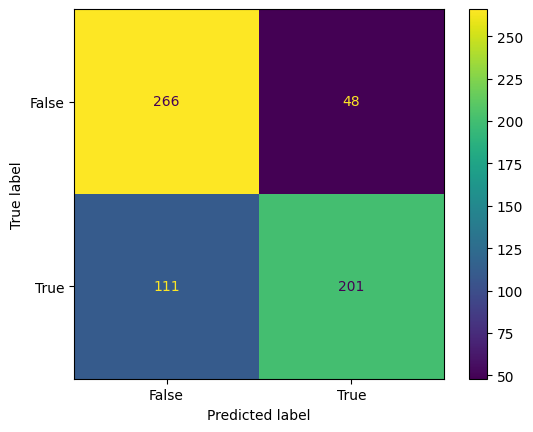

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
svmModelw2v = LinearSVC() #SVC(kernel='linear',C=12, gamma=0.0001) #LinearSVC() #SVC(C=1, gamma=0.0001)SVC(C=10, gamma=0.0001)
svmModelw2v.fit(X_train, y_train)
y_pred = svmModelw2v.predict(X_test)

print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
accuracy_score(y_test,y_pred)

## Export model
pickle.dump(svmModelw2v, open('D:\\NLP\\model\\word2vec-model-pro.pkl', 'wb'))
pickle.dump(model_w2v, open('D:\\NLP\\model\\word2vec-pro.pkl', 'wb'))

## Importing Model
word2vecSVM = pickle.load(open('D:\\NLP\\model\\word2vec-model-pro.pkl', 'rb'))
word2vecFeatures = pickle.load(open('D:\\NLP\\model\\word2vec-pro.pkl', 'rb'))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)
import matplotlib.pyplot as plt


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

#from sklearn import metrics
#scores = cross_val_score( svmModelw2v, X_train, y_train, cv=10, scoring='f1_macro')
#print(scores)

# word2vec + SVM Prediction unseen comments

In [141]:
#import the model
word2vecSVM = pickle.load(open('D:\\NLP\\model\\word2vec-model-pro.pkl', 'rb'))
word2vecFeatures = pickle.load(open('D:\\NLP\\model\\word2vec-pro.pkl', 'rb'))

test = ['ህወሓት ደሞ በተቃራኒው ስምምነቱ ዳር እንዳይደርስ በሙሉ ቁርጠኝነት እየሰራ ነዋ ::',
        'መሳርያ የላቸውም በፈለግነው ሰዓት ትግራይ መቆጣጠር እንችላለን አቅም የላቸውም እያልክ አልነበረም እንዴ ቱልቱላ',
        'ይህ ሁሉ የሆነው በማሸነፋችን ነው ህወሃት ሂሣብ እናወራርዳለን ፉከራ ወደ ትጥቅ መፍታት ያመጣው።']
test = clean_and_normalized_sentence(test,'')
test = morphologicalAnalysis(test['msg'])
unseen_df = pd.DataFrame({'msg':test}) 
x_unseen = unseen_df['msg'].apply(lambda x: x.split()) # tokenizing 
print(x_unseen)
import numpy as np
wordvec_arrays = np.zeros((len(x_unseen),word2vecFeatures.vector_size)) 
for i in range(len(x_unseen)):
    wordvec_arrays[i,:] = word_vector(x_unseen[i], word2vecFeatures.vector_size)
    x_unseen_w2v = pd.DataFrame(wordvec_arrays)
print(x_unseen_w2v.shape)
y_pred_unseen = word2vecSVM.predict(x_unseen_w2v)
print(y_pred_unseen.tolist())
print('******Prediction**********\n')


['ህወሓት ደሞ በተቃራኒው ስምምነቱ ዳር እንዳይደርስ በሙሉ ቁርጠኝነት እየሰራ ነዋ ::', 'መሳርያ የላቸውም በፈለግነው ሰዓት ትግራይ መቆጣጠር እንችላለን አቅም የላቸውም እያልክ አልነበረም እንዴ ቱልቱላ', 'ይህ ሁሉ የሆነው በማሸነፋችን ነው ህወሃት ሂሣብ እናወራርዳለን ፉከራ ወደ ትጥቅ መፍታት ያመጣው።']
ህወሓት ደሞ በተቃራኒው ስምምነቱ ዳር እንዳይደርስ በሙሉ ቁርጠኝነት እየሰራ ነዋ ::
መሳርያ የላቸውም በፈለግነው ሰዓት ትግራይ መቆጣጠር እንችላለን አቅም የላቸውም እያልክ አልነበረም እንዴ ቱልቱላ
ይህ ሁሉ የሆነው በማሸነፋችን ነው ህወሃት ሂሣብ እናወራርዳለን ፉከራ ወደ ትጥቅ መፍታት ያመጣው።
2
1
1  -  ህወሀት ደመመ ተቃራኒ ስምምነት ዳር ደረሰ ሙሉ ቁርጠኝነት ሰራ ነዋ
2
2  -  ተሳራ አለ ፈለገ ሰአት ትግራይ ተቆጣጠረ ቻለ አቅም አለ አለ ነበረ እንድ ቱልቱላ
3
3  -  ይህ ሁሉ ሆነ አሸነፈ ነው ህወሀት ሂሳብ አወራረደ ፉከራ ወደ ትጥቅ ፈታ አመጣ
0    [ህወሀት, ደመመ, ተቃራኒ, ስምምነት, ዳር, ደረሰ, ሙሉ, ቁርጠኝነት, ...
1    [ተሳራ, አለ, ፈለገ, ሰአት, ትግራይ, ተቆጣጠረ, ቻለ, አቅም, አለ, ...
2    [ይህ, ሁሉ, ሆነ, አሸነፈ, ነው, ህወሀት, ሂሳብ, አወራረደ, ፉከራ, ...
Name: msg, dtype: object
(3, 200)
[0, 0, 1]
******Prediction**********



In [24]:
from sklearn.model_selection import GridSearchCV


In [ ]:
X_train, X_test, y_train, y_test= train_test_split(wordvec_df,
                                                 labels,
                                                 test_size=0.2,
                                                 random_state=0)

In [34]:
X_train, X_test, y_train, y_test= train_test_split(featurespro,
                                                 labels,
                                                 test_size=0.2,
                                                 random_state=0)

In [35]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear']} 

In [36]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)


In [37]:
grid.fit(X_train, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.776 total time=  33.1s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.744 total time=  34.7s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.778 total time=  32.3s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.774 total time=  30.5s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.800 total time=  29.6s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.776 total time=  34.9s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.744 total time=  34.5s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.778 total time=  34.2s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.774 total time=  34.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.800 total time=  34.7s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.776 total time=  32.9s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear


KeyboardInterrupt



In [29]:
print(grid.best_params_)


{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


In [ ]:
print(grid.best_estimator_)


In [ ]:
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

In [ ]:
#test = ['ክፉውን መልካም፣ መልካሙን ክፉ፤ ጨለማን ብርሃን ፣ብርሃንን  ጨለማ፤ ጣፋጩን መራራ፣መራራውን ጣፋጭ የሚሉ( የሚያደርጉ) በሀገራችን በዙ።ጌታን እንፍራ ለኢትዮጵያ አንድነት።'
        #, 'አታፍሩም ግን በየቀኑ ሰው ሲታረድ እየዋለ ትንፍሽ እንኳ የማትሉ ክብሪ ቢሶች፡ አንድ ቀን ለፍርድ መቅረባችሁ አይቀርም ደግሞ ታያላችሁ፡ ከህውሀት የማትማሩ ታናሾች????' ]
test = ['ህወሓት ደሞ በተቃራኒው ስምምነቱ ዳር እንዳይደርስ በሙሉ ቁርጠኝነት እየሰራ ነዋ መንግሥት አለ እንዴ::','መንግሥት አለ እንዴ']
test = clean_and_normalized_sentence(test,'')
test = morphologicalAnalysis(test['msg'])
unseen_df = pd.DataFrame({'msg':test}) 



In [ ]:

X_unseen = tfidfpro.transform(unseen_df['msg']).toarray()
y_pred_unseen = svmtfTrainedModel.predict(X_unseen)

print(y_pred_unseen.tolist())
